In [2]:
#libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor


/Users/nyathirambugua/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
df = pd.read_csv("violence_data.csv")
df.head(100)

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8
...,...,...,...,...,...,...,...,...
95,351,Afghanistan,F,Residence,Rural,... for at least one specific reason,01/01/2015,82.1
96,351,Afghanistan,F,Residence,Urban,... for at least one specific reason,01/01/2015,74.0
97,71,Afghanistan,F,Residence,Rural,... if she argues with him,01/01/2015,60.6
98,71,Afghanistan,F,Residence,Urban,... if she argues with him,01/01/2015,54.7


In [5]:
df.shape

(12600, 8)

We have 8 columns and 12600 records. This means we have 7 features, excluding the target, "Value. Here is a document containing the list and description of all the features present in our database:



Let's get a list of all the features. We also want gto find out those that have missing values and the data type of each column.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               12600 non-null  int64  
 1   Country                12600 non-null  object 
 2   Gender                 12600 non-null  object 
 3   Demographics Question  12600 non-null  object 
 4   Demographics Response  12600 non-null  object 
 5   Question               12600 non-null  object 
 6   Survey Year            12600 non-null  object 
 7   Value                  11187 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 787.6+ KB


We can see that there are some null values in the Value column? Could this be situations where no one of the given demographic agreed with the reason?

To help us confirm this, let's first look at descriptive statistsics

In [17]:
df["Value"].describe()

count    11187.000000
mean        19.762537
std         16.986437
min          0.000000
25%          6.200000
50%         14.900000
75%         29.200000
max         86.900000
Name: Value, dtype: float64

from that- we can see that the min value is 0, meaning if no one agreed ", a value of 0 was given. Hence, null values are just a case of missing values. 

Let's try and investigate. We will create a function, that filters for null values that belong to a particular country. So the parameter will be country, and the argument passed when calling the function will be the actual name of the country we want to filter.  

In [47]:
# Define the function to filter for rows with missing values for a given country.
def filter_nulls_by_country(dataframe, country):
    
    nulls_df = dataframe[(dataframe['Value'].isnull()) & (dataframe['Country'] == country)]
    
    return nulls_df

In [48]:
filter_nulls_by_country(df, 'Yemen')

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
12150,418,Yemen,M,Age,15-24,... for at least one specific reason,01/01/2013,NaN
12151,418,Yemen,M,Age,25-34,... for at least one specific reason,01/01/2013,NaN
12152,418,Yemen,M,Age,35-49,... for at least one specific reason,01/01/2013,NaN
12153,138,Yemen,M,Age,15-24,... if she argues with him,01/01/2013,NaN
12154,138,Yemen,M,Age,25-34,... if she argues with him,01/01/2013,NaN
...,...,...,...,...,...,...,...,...
12235,208,Yemen,M,Residence,Urban,... if she goes out without telling him,01/01/2013,NaN
12236,278,Yemen,M,Residence,Rural,... if she neglects the children,01/01/2013,NaN
12237,278,Yemen,M,Residence,Urban,... if she neglects the children,01/01/2013,NaN
12238,348,Yemen,M,Residence,Rural,... if she refuses to have sex with him,01/01/2013,NaN


We can see particular patterns in the missing values, for example:

Afghansitan+marital status+never married+2015
yemem+2013

there are certain factors that might have led to this....

leave as Nan because will be treated as numeric…proceed with analysis as is for now

from the descriptive statistics, we can also Interpret:
- Great/ moderate variation in the data?
- 75% of the data, value between 0 and 29.2. We can see that there are reasons + demographic " that score significantly higher than the rest, given that max value is 86.9.

get a better understanding/ Look at the distribution of our target variable:

(array([3743., 2416., 1750., 1194.,  773.,  653.,  360.,  180.,   93.,
          25.]),
 array([ 0.  ,  8.69, 17.38, 26.07, 34.76, 43.45, 52.14, 60.83, 69.52,
        78.21, 86.9 ]),
 <BarContainer object of 10 artists>)

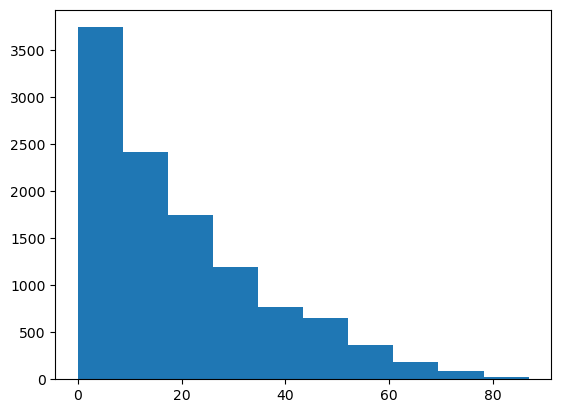

In [19]:
plt.hist(df["Value"])

We can see that there are outliers that skew the data to the right. We shall investigate the the justification and demographic characteristics that are responsible for this.

Let's remove duplicates:

In [20]:
df = df.drop_duplicates()
df.shape

(12600, 8)

The shape remains the same indicating that there were no duplicates in our dataset

check for cardinality in the categorical columns:

In [8]:
df.select_dtypes(include="object").nunique()

Country                  70
Gender                    2
Demographics Question     5
Demographics Response    15
Question                  6
Survey Year              18
dtype: int64

We have a whooping 70 countries represented in our dataset. It also seems our data spans 18 years?

Let's have a look at which countries these are:

In [21]:
df["Country"].unique()

array(['Afghanistan', 'Albania', 'Angola', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Benin', 'Bolivia', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Chad', 'Colombia', 'Comoros', 'Congo',
       'Congo Democratic Republic', "Cote d'Ivoire", 'Dominican Republic',
       'Egypt', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia',
       'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'India', 'Indonesia', 'Jordan', 'Kenya', 'Kyrgyz Republic',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Maldives', 'Mali',
       'Moldova', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Peru', 'Philippines',
       'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone',
       'South Africa', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo',
       'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'Yemen', 'Zambia',
       'Zimbabwe'], dtype=object)

It seems our data spans various countries, from various continents. To reduce scope, since the dataset contains alot of records, we want to filter for records that are related to African countries.

In [38]:
# List of African countries
african_countries = [
    'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Chad',
    'Comoros', 'Congo', 'Congo Democratic Republic', "Cote d'Ivoire", 
    'Egypt', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 
    'Ghana', 'Guinea', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 
    'Malawi', 'Mali', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 
    'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 
    'Sierra Leone', 'South Africa', 'Tanzania', 'Togo', 'Uganda', 
    'Zambia', 'Zimbabwe'
]

# Filter for records related to African countries
df_africa = df[df['Country'].isin(african_countries)].reset_index(drop=True)

In [39]:
df_africa.head(10)

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,3,Angola,F,Education,Higher,... if she burns the food,01/01/2015,0.9
1,3,Angola,F,Education,Secondary,... if she burns the food,01/01/2015,5.3
2,3,Angola,F,Residence,Urban,... if she burns the food,01/01/2015,6.9
3,3,Angola,F,Employment,Unemployed,... if she burns the food,01/01/2015,8.8
4,3,Angola,F,Marital status,Never married,... if she burns the food,01/01/2015,9.8
5,3,Angola,F,Employment,Employed for cash,... if she burns the food,01/01/2015,9.9
6,3,Angola,F,Age,25-34,... if she burns the food,01/01/2015,10.0
7,3,Angola,F,Age,15-24,... if she burns the food,01/01/2015,10.6
8,3,Angola,F,Marital status,Married or living together,... if she burns the food,01/01/2015,10.8
9,3,Angola,F,Age,35-49,... if she burns the food,01/01/2015,11.0


In [40]:
print("No. of countries:", df_africa["Country"].nunique())
print("Dataset shape:", df_africa.shape)
print(df_africa.info())

No. of countries: 39
Dataset shape: (7020, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7020 entries, 0 to 7019
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               7020 non-null   int64  
 1   Country                7020 non-null   object 
 2   Gender                 7020 non-null   object 
 3   Demographics Question  7020 non-null   object 
 4   Demographics Response  7020 non-null   object 
 5   Question               7020 non-null   object 
 6   Survey Year            7020 non-null   object 
 7   Value                  6672 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 438.9+ KB
None


We are now down to 7020 records, spanning across 39 various African countries. It seems we have reduced our data to about half.

We note that missing values have persisted even in our reduced dataset, about 350. Let's investigate whether there is a patterrn just like we did with the larger dataset, using the same function:

In [42]:
# Define the function to filter for rows with missing values for a given country.
def filter_nulls_by_country(dataframe, country):
    
    nulls_df = dataframe[(dataframe['Value'].isnull()) & (dataframe['Country'] == country)]
    
    return nulls_df

In [46]:
filter_nulls_by_country(df_africa, 'South Africa')

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
6073,409,South Africa,M,Employment,Employed for kind,... for at least one specific reason,01/01/2016,NaN
6076,129,South Africa,M,Employment,Employed for kind,... if she argues with him,01/01/2016,NaN
6079,59,South Africa,M,Employment,Employed for kind,... if she burns the food,01/01/2016,NaN
6082,199,South Africa,M,Employment,Employed for kind,... if she goes out without telling him,01/01/2016,NaN
6085,269,South Africa,M,Employment,Employed for kind,... if she neglects the children,01/01/2016,NaN
6088,339,South Africa,M,Employment,Employed for kind,... if she refuses to have sex with him,01/01/2016,NaN


Congo - missing values for 2011
South Africa - 2016+ those eomployed for kind

there are certain factors that might have led to this....

leave as Nan because will be treated as numeric…proceed with analysis as is for now

from the descriptive statistics, we can also Interpret:

Great/ moderate variation in the data?
75% of the data, value between 0 and 29.2. We can see that there are reasons + demographic " that score significantly higher than the rest, given that max value is 86.9.
get a better understanding/ Look at the distribution of our target variable:

plt.hist(df["Value"])
(array([3743., 2416., 1750., 1194.,  773.,  653.,  360.,  180.,   93.,
          25.]),
 array([ 0.  ,  8.69, 17.38, 26.07, 34.76, 43.45, 52.14, 60.83, 69.52,
        78.21, 86.9 ]),
 <BarContainer object of 10 artists>)

We can see that there are outliers that skew the data to the right. We shall investigate the the justification and demographic characteristics that are responsible for this.

Let's remove duplicates:
df = df.drop_duplicates()
df.shape
(12600, 8)
The shape remains the same indicating that there were no duplicates in our dataset

check for cardinality in the categorical columns:

df.select_dtypes(include="object").nunique()
Country                  70
Gender                    2
Demographics Question     5
Demographics Response    15
Question                  6
Survey Year              18
dtype: int64

- The distribution seems to be right skewed
- Some outliers present -  **how do we handle them?**
- Most houses seem to lie between 150,000 and 250,000 (roughly) - reason for extremes?

Let's first quickly fit a random forest regressor to extract feature importance and select relevant features:
- drop rows with null values- imputing feels too complicated for this stage
- we wont split coz only interested in feature importance and not model evaluation
- use pd.get_dummies instead of onehot encoder- quick conversion

In [70]:
df1_nul=df1.dropna()

In [71]:
df1_nul.shape

(1094, 75)

In [78]:
# Encode categorical variables
df_encoded = pd.get_dummies(df1_nul)

# Define X and y
X = df_encoded.drop(columns=['SalePrice', 'Id'])  # Features
y = df_encoded['SalePrice']  # Target

# Train a random forest regressor to get feature importances
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Combine feature names and their importances into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [77]:
feature_importance_df.head(20)

,Feature,Importance
3,OverallQual,0.607358
15,GrLivArea,0.096475
13,2ndFlrSF,0.047318
8,BsmtFinSF1,0.026488
11,TotalBsmtSF,0.023229
18,FullBath,0.019993
12,1stFlrSF,0.019673
2,LotArea,0.011043
26,GarageArea,0.010302
22,TotRmsAbvGrd,0.010099


In [85]:
important = feature_importance_df["Feature"].head(20)
list(important)

['OverallQual',
 'GrLivArea',
 '2ndFlrSF',
 '1stFlrSF',
 'BsmtFinSF1',
 'FullBath',
 'TotalBsmtSF',
 'LotArea',
 'GarageArea',
 'GarageCars',
 'LotFrontage',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'BsmtQual_Ex',
 'GarageYrBlt',
 'OpenPorchSF',
 'MasVnrArea',
 'BsmtUnfSF',
 'OverallCond']

In [ ]:
According to reserach, real estate experts say that 